# LetsGrowMore Internship

# Name:- Shivam Singhal

## Develop A Neural Network That Can Read Handwriting:

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

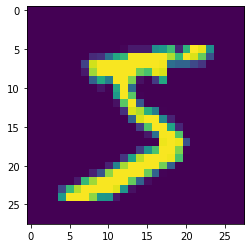

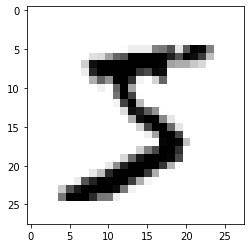

In [6]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

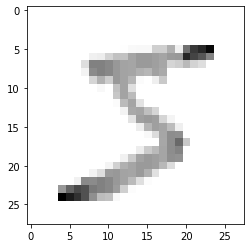

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
img_size = 28
x_trainx = np.array(x_train).reshape(-1, img_size, img_size,1)
x_testx = np.array(x_test).reshape(-1, img_size, img_size,1)
print("Training samples :", x_trainx.shape)
print("Testing samples :",x_testx.shape)

Training samples : (60000, 28, 28, 1)
Testing samples : (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Dense, Flatten, Activation

In [12]:
# creating neural network
model = Sequential()

# first convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainx.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# second convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# third convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))


2022-01-08 15:59:56.221093: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(x_trainx, 
          y_train, 
          epochs=10, 
          validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0681 - val_accuracy: 0.9792
Epoch 2/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0583 - val_accuracy: 0.9819
Epoch 3/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0712 - val_accuracy: 0.9793
Epoch 4/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 5/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.0612 - val_accuracy: 0.9840
Epoch 6/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0646 - val_accuracy: 0.9838
Epoch 7/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0688 -

In [17]:
test_loss, test_acc = model.evaluate(x_testx, y_test)
print("testing loss on 10,000 test samples ", test_loss)
print("testing acc on 10,000 test samples ", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0742 - accuracy: 0.9848
testing loss on 10,000 test samples  0.0741962343454361
testing acc on 10,000 test samples  0.9847999811172485


In [18]:
predictions = model.predict([x_testx])

In [21]:
print(np.argmax(predictions[1]))

2


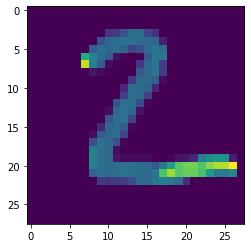

In [22]:
plt.imshow(x_testx[1])

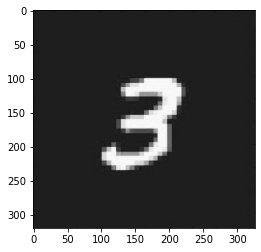

In [30]:
img = cv2.imread('testing images/3.jpg')
plt.imshow(img)

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [32]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [33]:
resized.shape

(28, 28)

In [34]:
new_img = tf.keras.utils.normalize(resized, axis=1)
new_img = np.array(new_img).reshape(-1, img_size, img_size, 1)
new_img.shape

(1, 28, 28, 1)

In [35]:
prediction = model.predict(new_img)
print(np.argmax(prediction))

3


In [29]:
model.save('handWritten.h5')